# Kaggle Advance House Price prediction using pytorch - Tabular dataset
https://docs.fast.ai/tabular.html<br>
https://www.fast.ai/2018/04/29/categorical-embeddings/ <br>
https://yashuseth.blog/2018/07/22/pytorch-neural-network-for-tabular-data-with-categorical-embeddings/



Feature Engineering {Cateogrical --- Embedding Layer, Continous Variable}<br>
Pythonic Class to create feed forward neural network

1. Category Embedding

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('houseprice.csv', usecols = ["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

In [4]:
df.shape

(1201, 10)

In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [9]:
df.describe

<bound method NDFrame.describe of       MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  YearBuilt  \
0             60       RL         65.0     8450   Pave      Reg       2003   
1             20       RL         80.0     9600   Pave      Reg       1976   
2             60       RL         68.0    11250   Pave      IR1       2001   
3             70       RL         60.0     9550   Pave      IR1       1915   
4             60       RL         84.0    14260   Pave      IR1       2000   
...          ...      ...          ...      ...    ...      ...        ...   
1455          60       RL         62.0     7917   Pave      Reg       1999   
1456          20       RL         85.0    13175   Pave      Reg       1978   
1457          70       RL         66.0     9042   Pave      Reg       1941   
1458          20       RL         68.0     9717   Pave      Reg       1950   
1459          20       RL         75.0     9937   Pave      Reg       1965   

      1stFlrSF  2ndFlrSF  Sal

1. Cateogrical Features --> Handled by Embedding Layers
2. Numerical feataures (no such special handler is required)

In [10]:
for i in df.columns:
    print("Column name {} and unique values are {}".format(i, len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [11]:
import datetime
datetime.datetime.now().year

2024

In [13]:
# Creating a derived features which will be total number of year, i.e.,
# difference between present year - year in the table

df['Total Years'] = datetime.datetime.now().year - df['YearBuilt']

In [14]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,21
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,48
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,23
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,109
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,24


In [15]:
df.drop("YearBuilt", axis = 1, inplace = True)

In [16]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,21
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,48
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,23
3,70,RL,60.0,9550,Pave,IR1,961,756,140000,109
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,24


In [17]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [18]:
cat_features = ["MSSubClass", "MSZoning", "Street", "LotShape"]
out_feature = "SalesPrice"

Handling one categorical feature first:

In [20]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders = {}
lbl_encoders["MSSubClass"] = LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [21]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

#### Doing the smae thing as we done for MSSubClass on all the categorical features:

In [25]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders = {}
for feature in cat_features:
    lbl_encoders[feature] = LabelEncoder()
    df[feature] = lbl_encoders[feature].fit_transform(df[feature])

In [26]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,21
1,0,3,80.0,9600,1,3,1262,0,181500,48
2,5,3,68.0,11250,1,0,920,866,223500,23
3,6,3,60.0,9550,1,0,961,756,140000,109
4,5,3,84.0,14260,1,0,1145,1053,250000,24
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,25
1456,0,3,85.0,13175,1,3,2073,0,210000,46
1457,6,3,66.0,9042,1,3,1188,1152,266500,83
1458,0,3,68.0,9717,1,3,1078,0,142125,74


1. Steps for handling Features ---><br>
a). Label Encoding <br>
b). take all the catgorical features --> {numpy, torch --> tensors} --> <br>
c). Let's take all the continous values <br>
d). Continous Variable --> Numpy --> torch --> Tensors <br>
e). Using Embedding Layers (only for categorical features)

In [29]:
### Stacking and Converting the Tensors
import numpy as np
cat_features = np.stack([df['MSSubClass'], df['MSZoning'], df['Street'], df['LotShape']], axis = 1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

#### Note:
<b>Cateogrical features can never be converted into the float as like in other cases, it should be converted in integer as done below</b>

In [32]:
### Convert numpy to Tensors
import torch
cat_features = torch.tensor(cat_features, dtype = torch.int64)
cat_features

C:\Users\arana\AppData\Local\Temp\ipykernel_14132\179690296.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cat_features = torch.tensor(cat_features, dtype = torch.int64)


tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [33]:
### Create continous variable
cont_features = []
for i in df.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [34]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [35]:
### Stacking continous variable to a tensor
cont_values = np.stack([df[i].values for i in cont_features], axis = 1)
cont_values = torch.tensor(cont_values, dtype = torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [36]:
cont_values.dtype

torch.float32

<b>Why Embedding over OneHotEncoding?<br></b>
Due to better performance (See Word2Vec for more info)
In word2vec the relation between the variables and values in the feature is properly captured due to embedding

In [38]:
### Dependent feature
y = torch.tensor(df['SalePrice'].values, dtype = torch.float).reshape(-1,1) #reshape important since it converts the 1D tensor in a 2Dimensional tensor
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int32  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int32  
 5   LotShape     1201 non-null   int32  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total Years  1201 non-null   int64  
dtypes: float64(1), int32(3), int64(6)
memory usage: 89.1 KB


In [40]:
cat_features.shape, cont_values.shape, y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [41]:
df.shape

(1201, 10)

In [42]:
len(df['MSSubClass'].unique())

15

## Embedding for categorical columns

We need the length of unique values of each categorical column, since it will tell the embedding layer about its input and based on this what will be the output

In [46]:
cat_dimension = [len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]

In [47]:
cat_dimension

[15, 5, 2, 4]

#### Thumb Rule:<br>
Output dimension should be set based on the input dimension(min(50, feature_dimension / 2))

here, feature_dimension = no. of unique values in a feature

In [49]:
embedding_dimension = [(x, min(50, (x + 1) // 2)) for x in cat_dimension]

In [50]:
embedding_dimension

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embedded_representation = nn.ModuleList([nn.Embedding(inp, out) for inp,out in embedding_dimension])
embedded_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [52]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [53]:
cat_featuresz = cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [54]:
pd.set_option('display.max_rows', 500)
embedding_val = []
for i,e in enumerate(embedded_representation):
    embedding_val.append(e(cat_features[:,i]))

In [55]:
embedding_val

[tensor([[-0.3471, -0.2579,  0.8902,  ...,  1.0906,  1.2262,  1.2660],
         [ 1.5751, -0.3561,  0.6400,  ...,  0.4685, -0.1423, -1.4047],
         [-0.3471, -0.2579,  0.8902,  ...,  1.0906,  1.2262,  1.2660],
         ...,
         [ 0.1333, -0.1921, -1.1465,  ..., -0.9317,  0.1480,  0.3066],
         [ 1.5751, -0.3561,  0.6400,  ...,  0.4685, -0.1423, -1.4047],
         [ 1.5751, -0.3561,  0.6400,  ...,  0.4685, -0.1423, -1.4047]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[ 1.2855, -1.5032, -1.0950],
         [ 1.2855, -1.5032, -1.0950],
         [ 1.2855, -1.5032, -1.0950],
         ...,
         [ 1.2855, -1.5032, -1.0950],
         [ 1.2855, -1.5032, -1.0950],
         [ 1.2855, -1.5032, -1.0950]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.3029],
         [0.3029],
         [0.3029],
         ...,
         [0.3029],
         [0.3029],
         [0.3029]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.3736, -1.1967],
         [ 0.3736, -1.1967],
         [-1.8550,  0.7724],

In [56]:
z = torch.cat(embedding_val, axis = 1)
z

tensor([[-0.3471, -0.2579,  0.8902,  ...,  0.3029,  0.3736, -1.1967],
        [ 1.5751, -0.3561,  0.6400,  ...,  0.3029,  0.3736, -1.1967],
        [-0.3471, -0.2579,  0.8902,  ...,  0.3029, -1.8550,  0.7724],
        ...,
        [ 0.1333, -0.1921, -1.1465,  ...,  0.3029,  0.3736, -1.1967],
        [ 1.5751, -0.3561,  0.6400,  ...,  0.3029,  0.3736, -1.1967],
        [ 1.5751, -0.3561,  0.6400,  ...,  0.3029,  0.3736, -1.1967]],
       grad_fn=<CatBackward0>)

#### Stack vs Cat

Stack used in numpy while cat in tensors

In [57]:
#### Implement dropout layer
dropout = nn.Dropout(.4) # To avoid Overfitting

In [58]:
final_embedded = dropout(z)
final_embedded

tensor([[-0.0000, -0.0000,  1.4836,  ...,  0.5048,  0.6226, -0.0000],
        [ 0.0000, -0.0000,  1.0667,  ...,  0.0000,  0.6226, -1.9946],
        [-0.5786, -0.4298,  0.0000,  ...,  0.5048, -3.0917,  0.0000],
        ...,
        [ 0.2222, -0.3202, -1.9109,  ...,  0.0000,  0.6226, -0.0000],
        [ 0.0000, -0.0000,  1.0667,  ...,  0.0000,  0.6226, -0.0000],
        [ 2.6252, -0.0000,  0.0000,  ...,  0.5048,  0.6226, -0.0000]],
       grad_fn=<MulBackward0>)

In [60]:
### Create Feed Forward Neural Network
### based on the same above steps

import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):
    def __init__(self, embedding_dim, n_cont, out_sz, layers, p = 0.5):
        '''
        embedding_dim = embedding dimension
        n_cont
        out_sz = output layer
        p = dropout ratio
        '''
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim)) #Total dimension
        n_in = n_emb + n_cont # Total input

        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [61]:
torch.manual_seed(100)
model = FeedForwardNN(embedding_dimension, len(cont_features), 1, [100, 50], p = 0.4)

In [62]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

#### Define Loss and Optimizer

In [63]:
loss_function = nn.MSELoss() ## Later convert to RMSE
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [65]:
batch_size = 1200
test_size = int(batch_size*0.15)

train_categorical = cat_features[:batch_size-test_size]
test_categorical = cat_features[batch_size-test_size:batch_size]

train_cont = cont_values[:batch_size-test_size]
test_cont = cont_values[batch_size-test_size:batch_size]

y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [66]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [67]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i = i + 1
    y_pred = model(train_categorical,train_cont)
    loss = torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i % 10 == 1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad() # resets the optimizer
    loss.backward() # does the back propogation with .backward() function
    optimizer.step()

Epoch number: 1 and the loss : 200496.75
Epoch number: 11 and the loss : 200493.46875
Epoch number: 21 and the loss : 200489.140625
Epoch number: 31 and the loss : 200482.640625
Epoch number: 41 and the loss : 200473.25
Epoch number: 51 and the loss : 200461.375
Epoch number: 61 and the loss : 200446.40625
Epoch number: 71 and the loss : 200429.359375
Epoch number: 81 and the loss : 200408.0
Epoch number: 91 and the loss : 200383.421875
Epoch number: 101 and the loss : 200355.3125
Epoch number: 111 and the loss : 200322.125
Epoch number: 121 and the loss : 200291.4375
Epoch number: 131 and the loss : 200252.015625
Epoch number: 141 and the loss : 200206.59375
Epoch number: 151 and the loss : 200162.234375
Epoch number: 161 and the loss : 200112.234375
Epoch number: 171 and the loss : 200059.625
Epoch number: 181 and the loss : 200005.75
Epoch number: 191 and the loss : 199946.40625
Epoch number: 201 and the loss : 199881.546875
Epoch number: 211 and the loss : 199815.78125
Epoch number

In [69]:
### converting the final_losses into the numpy for proper graphical
### Representation using matplotlib (using tensors withoout any conversion
### causes an error

final_losses_numpy = []
for i in final_losses:
    final_losses_numpy.append(i.detach().numpy())
final_losses_numpy

[array(200496.75, dtype=float32),
 array(200496.4, dtype=float32),
 array(200496.06, dtype=float32),
 array(200495.73, dtype=float32),
 array(200495.4, dtype=float32),
 array(200495.14, dtype=float32),
 array(200494.78, dtype=float32),
 array(200494.5, dtype=float32),
 array(200494.17, dtype=float32),
 array(200493.81, dtype=float32),
 array(200493.47, dtype=float32),
 array(200493.17, dtype=float32),
 array(200492.75, dtype=float32),
 array(200492.28, dtype=float32),
 array(200492.03, dtype=float32),
 array(200491.52, dtype=float32),
 array(200491.06, dtype=float32),
 array(200490.6, dtype=float32),
 array(200490.06, dtype=float32),
 array(200489.6, dtype=float32),
 array(200489.14, dtype=float32),
 array(200488.31, dtype=float32),
 array(200488., dtype=float32),
 array(200487.4, dtype=float32),
 array(200486.8, dtype=float32),
 array(200485.9, dtype=float32),
 array(200485.53, dtype=float32),
 array(200484.64, dtype=float32),
 array(200484.08, dtype=float32),
 array(200483.25, dtype=

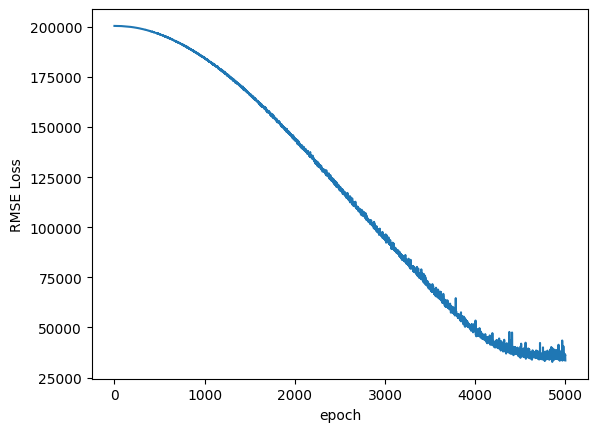

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses_numpy)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [73]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 53213.99609375


In [74]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [75]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [76]:
data_predicted

,Prediction
0,113246.789062
1,188545.296875
2,146020.171875
3,218163.765625
4,207466.531250
5,202523.921875
6,150986.687500
7,307970.125000
8,157131.218750
9,369699.031250


In [77]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,113246.789062,16753.210938
1,138887.0,188545.296875,-49658.296875
2,175500.0,146020.171875,29479.828125
3,195000.0,218163.765625,-23163.765625
4,142500.0,207466.531250,-64966.531250


In [78]:
#### Save the model
torch.save(model,'HousePrice.pt')

In [79]:
### saving using state_dict which helps to save the weights of the model
torch.save(model.state_dict(),'HouseWeights.pt')

In [81]:
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)] #required for loading
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [82]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [83]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)